In [13]:
#Numpy
import numpy as np

#Panday
import pandas as pd

#Cv2
import cv2

#Seaborn
import seaborn as sns

#Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#Scikit-Image
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate
from skimage import data, filters, measure, morphology
from skimage.io import imread
import skimage.color
import skimage.io
from skimage import io
from skimage.util import img_as_ubyte
from skimage.segmentation import clear_border

#Plotly
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [14]:
#Input the path you need.
img = cv2.imread('C:\\Users\\NAHUELH\\Desktop\\IMAGES GIT HUB\\6.tif')

In [15]:
#I convert my image in a array with values to represent the intesity of the pixels.
array = np.array(img)

#Divide my array in 3 channel, each channel represent a colour in the RGB system(Red, Green and Blue).
#I choice the red filter, it have the best contrast between cells and enviroment.
red = array[:,:, 0]
#green = array[:,:, 1]
#blue = array[:,:, 2]

#Replace each pixel in an image with a black pixel if the image intensity is less than some fixed constant T-curvature or a white pixel if the image intensity is greater than that constant.
threshold = filters.threshold_otsu(red)
mask =  red<= threshold

#Input minimum size. The smallest allowable object size.
mask = morphology.remove_small_objects(mask, 7000)

#Input areas threshold.The maximum area, in pixels, of a contiguous hole that will be filled.
mask = morphology.remove_small_holes(mask, 7000)

#Two pixels are connected when they are neighbors and have the same value.
labels = measure.label(mask)
fig = px.imshow(red, binary_string=True)

68.32070011399654
67.59108114142565
67.12150854095482
67.9519805890224
68.21313982639693
67.43315465550474
67.89190378544983
68.49856922447948
72.30412991468289
71.04264537709975
71.8109214239126
73.57760186377814
71.82932743849781
72.11477860788852
73.91709566105675



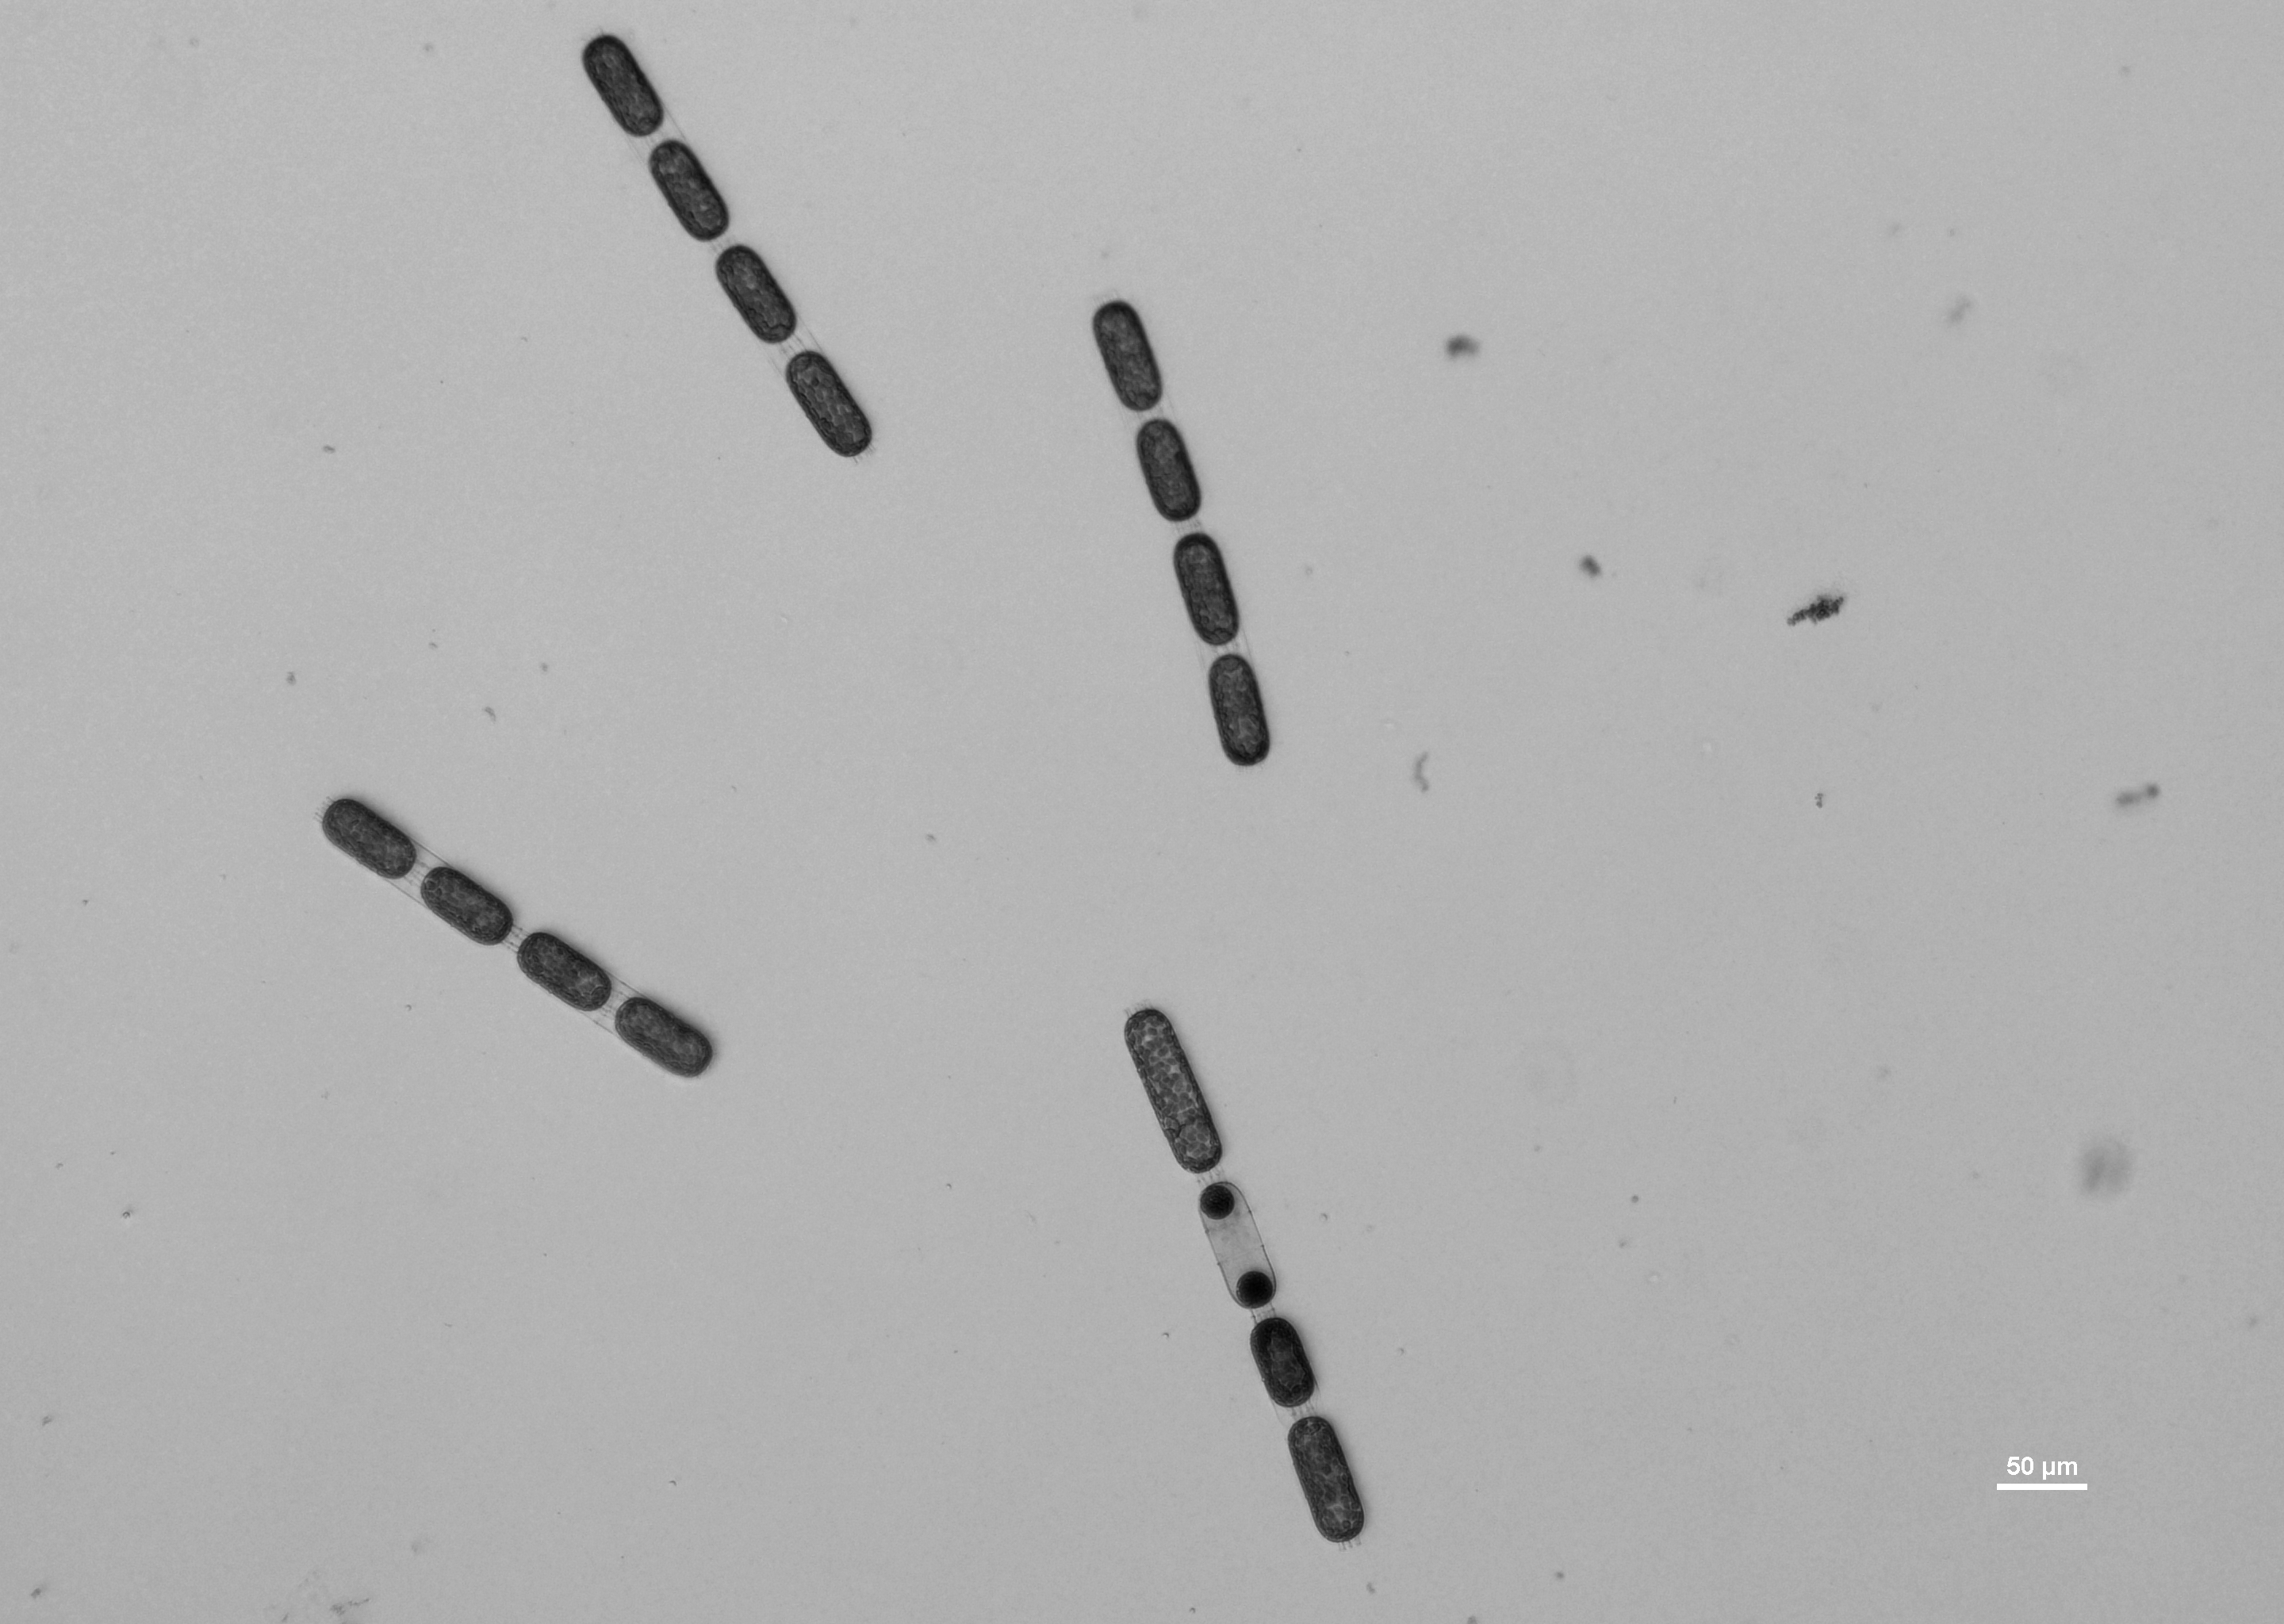

In [16]:
#Style and traces for label info.
fig.update_traces(hoverinfo='skip') 

#I get all measures of the labels.
props = measure.regionprops(labels,red)

#I select the properties I wish to get and print.
properties = ['minor_axis_length']

#This loop generate the index for all the labels with your measures.
for index in range(0, labels.max()):
    
    label_i = props[index].label
    contour = measure.find_contours(labels == label_i,0.5)[0]
    y, x = contour.T
    hoverinfo = ''
    
    #This loop evaluate all measures in the properties and saved all the data in hoverinfo to show it in the plot.
    for prop_name in properties:
        
        hoverinfo += f'<b>{prop_name}: {getattr(props[index], prop_name):.2f}</b><br>'
        #Only show the values of properties without index.
        array = np.array(getattr(props[index], prop_name))
        print(array)
    
    #Style and traces of the plot.
    fig.add_trace(go.Scatter(x=x, y=y, name=label_i,mode='lines', fill='toself', showlegend=True,hovertemplate=hoverinfo,hoveron='points+fills'))

#You can change width and height of the plot.
plotly.io.show(fig,width=10000,height=10000)

In [17]:
#Generate a Dataframe with all the properties I want to have in my DataFrame.
props = regionprops_table(labels, properties = ['minor_axis_length','major_axis_length','area','perimeter'])

#I save the Dataframe in this variable.
df = pd.DataFrame(props) 

#I can filter the Dataframe for a measure and value.
df2 = df[df['minor_axis_length'] > 70] 

#I print the DataFrame.
print("Given Dataframe :\n", df2) 

#It download the dataframe at any path you want in Excel format.
df2.to_excel('W:\\LAB\\Nahuel Ramos\\Size reduction data\\DATA TABLES\\BATCH EXCEL\\1.xlsx', index = False)

Given Dataframe :
     minor_axis_length  major_axis_length   area   perimeter
8           72.304130         138.707297   7802  385.060967
9           71.042645         136.475779   7555  374.096500
10          71.810921         138.442039   7748  376.439646
11          73.577602         142.773221   8179  388.410209
12          71.829327         238.997370  13267  567.978751
13          72.114779         126.399729   7102  387.362482
14          73.917096         177.291918  10179  452.818326
